# Steph Curry Popcorn Ranking Analysis

## 1. Region and Domain

San Francisco, California

Sports and Athletics


## 2. Research Question 

Is there a relationship between Steph Curry's ranking of a stadium's popcorn during the 2018-2019 season and his team, the Golden State Warrior's, performance at that stadium?

## 3. Links

[Steph Curry Popcorn Ratings](https://data.world/makeovermonday/2019w17)

[2018-2019 Golden State Warriors Schedule and Results](https://www.basketball-reference.com/teams/GSW/2019_games.html)


# Data Loading and Cleansing

In [36]:
# required packages 

import pandas as pd

In [37]:
# load data 

popcorn_ratings = pd.read_excel('Data\StephCurryStadiumPopcornRankings.xlsx')
season_results = pd.read_csv('Data\GoldenStateWarriors2018-19SeasonResults.csv')


In [38]:
popcorn_ratings.head()

,TEAM,ARENA,FRESHNESS,SALTINESS,CRUNCHINESS,BUTTER,PRESENTATION,TOTAL SCORE
0,Dallas Mavericks,American Airlines Center,5,5,4,5,5,24
1,Brooklyn Nets,Barclays Center,4,5,5,4,5,23
2,Miami Heat,American Airlines Arena,5,4,4,4,5,22
3,Portland Trailblazers,Moda Center,4,4,5,4,3,20
4,Sacramento Kings,Golden 1 Center,2,4,4,4,5,19


In [39]:
season_results.head()

,G,Date,Start (ET),Unnamed: 3,Unnamed: 4,Unnamed: 5,Opponent,Unnamed: 7,Unnamed: 8,Tm,Opp,W,L,Streak,Notes
0,1,Tue Oct 16 2018,10:30p,NaN,Box Score,NaN,Oklahoma City Thunder,W,NaN,108,100,1,0,W 1,NaN
1,2,Fri Oct 19 2018,10:30p,NaN,Box Score,@,Utah Jazz,W,NaN,124,123,2,0,W 2,NaN
2,3,Sun Oct 21 2018,8:00p,NaN,Box Score,@,Denver Nuggets,L,NaN,98,100,2,1,L 1,NaN
3,4,Mon Oct 22 2018,10:30p,NaN,Box Score,NaN,Phoenix Suns,W,NaN,123,103,3,1,W 1,NaN
4,5,Wed Oct 24 2018,10:30p,NaN,Box Score,NaN,Washington Wizards,W,NaN,144,122,4,1,W 2,NaN


### Cleansing Popcorn Ratings

In [40]:
popcorn_ratings.columns

Index(['TEAM', 'ARENA', 'FRESHNESS', 'SALTINESS', 'CRUNCHINESS', 'BUTTER',
       'PRESENTATION', 'TOTAL SCORE'],
      dtype='object')

In [41]:
popcorn_ratings = popcorn_ratings.rename(columns={'TEAM':'Opponent', 'ARENA':'Arena', 'FRESHNESS':'Freshness', 'SALTINESS':'Saltiness', 'CRUNCHINESS':'Crunchiness', 'BUTTER':'Butter', 'PRESENTATION':'Presentation', 'TOTAL SCORE':'Total_Score'}
                                         )

In [42]:
popcorn_ratings.head()

,Opponent,Arena,Freshness,Saltiness,Crunchiness,Butter,Presentation,Total_Score
0,Dallas Mavericks,American Airlines Center,5,5,4,5,5,24
1,Brooklyn Nets,Barclays Center,4,5,5,4,5,23
2,Miami Heat,American Airlines Arena,5,4,4,4,5,22
3,Portland Trailblazers,Moda Center,4,4,5,4,3,20
4,Sacramento Kings,Golden 1 Center,2,4,4,4,5,19


In [43]:
popcorn_ratings['Total_Score'] = popcorn_ratings['Total_Score'] / 25

In [44]:
popcorn_ratings.head()

,Opponent,Arena,Freshness,Saltiness,Crunchiness,Butter,Presentation,Total_Score
0,Dallas Mavericks,American Airlines Center,5,5,4,5,5,0.96
1,Brooklyn Nets,Barclays Center,4,5,5,4,5,0.92
2,Miami Heat,American Airlines Arena,5,4,4,4,5,0.88
3,Portland Trailblazers,Moda Center,4,4,5,4,3,0.80
4,Sacramento Kings,Golden 1 Center,2,4,4,4,5,0.76


In [45]:
popcorn_ratings[['Opponent']].value_counts()

Opponent              
Atlanta Hawks             1
Boston Celtics            1
Utah Jazz                 1
Toronto Raptors           1
San Antonio Spurs         1
Sacramento Kings          1
Portland Trailblazers     1
Phoenix Suns              1
Philadelphia Sixers       1
Orlando Magic             1
Oklahoma City Thunder     1
New York City Knicks      1
New Orleans Pelicans      1
Minnesota Timberwolves    1
Milwaukee Bucks           1
Miami Heat                1
Memphis Grizzlies         1
Los Angeles Lakers        1
Los Angeles Clippers      1
Indiana Pacers            1
Houston Rockets           1
Golden State Warriors     1
Detroit Pistons           1
Denver Nuggets            1
Dallas Mavericks          1
Cleveland Cavaliers       1
Chicago Bulls             1
Charlotte Hornets         1
Brooklyn Nets             1
Washington Wizards        1
dtype: int64

'Los Angeles Clippers/Lakers' will be different in the results dataframe. Will handle after cleansing the results dataframe. 

### Results Cleansing

In [46]:
season_results.head()

,G,Date,Start (ET),Unnamed: 3,Unnamed: 4,Unnamed: 5,Opponent,Unnamed: 7,Unnamed: 8,Tm,Opp,W,L,Streak,Notes
0,1,Tue Oct 16 2018,10:30p,NaN,Box Score,NaN,Oklahoma City Thunder,W,NaN,108,100,1,0,W 1,NaN
1,2,Fri Oct 19 2018,10:30p,NaN,Box Score,@,Utah Jazz,W,NaN,124,123,2,0,W 2,NaN
2,3,Sun Oct 21 2018,8:00p,NaN,Box Score,@,Denver Nuggets,L,NaN,98,100,2,1,L 1,NaN
3,4,Mon Oct 22 2018,10:30p,NaN,Box Score,NaN,Phoenix Suns,W,NaN,123,103,3,1,W 1,NaN
4,5,Wed Oct 24 2018,10:30p,NaN,Box Score,NaN,Washington Wizards,W,NaN,144,122,4,1,W 2,NaN


In [47]:
season_results.columns

Index(['G', 'Date', 'Start (ET)', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Opponent', 'Unnamed: 7', 'Unnamed: 8', 'Tm', 'Opp', 'W', 'L', 'Streak',
       'Notes'],
      dtype='object')

In [48]:
season_results = season_results[['G', 'Date', 'Unnamed: 5','Opponent', 'Unnamed: 7', 'Tm', 'Opp', 'W', 'L', 'Streak' ]]

season_results.head()

,G,Date,Unnamed: 5,Opponent,Unnamed: 7,Tm,Opp,W,L,Streak
0,1,Tue Oct 16 2018,NaN,Oklahoma City Thunder,W,108,100,1,0,W 1
1,2,Fri Oct 19 2018,@,Utah Jazz,W,124,123,2,0,W 2
2,3,Sun Oct 21 2018,@,Denver Nuggets,L,98,100,2,1,L 1
3,4,Mon Oct 22 2018,NaN,Phoenix Suns,W,123,103,3,1,W 1
4,5,Wed Oct 24 2018,NaN,Washington Wizards,W,144,122,4,1,W 2


In [49]:
season_results = season_results.rename(columns={'G':'Game_Count', 'Unnamed: 5': 'Away','Unnamed: 7':'Outcome' })

In [50]:
season_results.head()

,Game_Count,Date,Away,Opponent,Outcome,Tm,Opp,W,L,Streak
0,1,Tue Oct 16 2018,NaN,Oklahoma City Thunder,W,108,100,1,0,W 1
1,2,Fri Oct 19 2018,@,Utah Jazz,W,124,123,2,0,W 2
2,3,Sun Oct 21 2018,@,Denver Nuggets,L,98,100,2,1,L 1
3,4,Mon Oct 22 2018,NaN,Phoenix Suns,W,123,103,3,1,W 1
4,5,Wed Oct 24 2018,NaN,Washington Wizards,W,144,122,4,1,W 2


In [51]:
season_results['Away'] = season_results['Away'].apply(lambda x : 1 if x == "@" else 0)

In [52]:

season_results.head()

,Game_Count,Date,Away,Opponent,Outcome,Tm,Opp,W,L,Streak
0,1,Tue Oct 16 2018,0,Oklahoma City Thunder,W,108,100,1,0,W 1
1,2,Fri Oct 19 2018,1,Utah Jazz,W,124,123,2,0,W 2
2,3,Sun Oct 21 2018,1,Denver Nuggets,L,98,100,2,1,L 1
3,4,Mon Oct 22 2018,0,Phoenix Suns,W,123,103,3,1,W 1
4,5,Wed Oct 24 2018,0,Washington Wizards,W,144,122,4,1,W 2


In [53]:
season_results['Outcome'] = season_results['Outcome'].apply(lambda x: 1 if x == "W" else 0)

In [54]:
season_results.head()

,Game_Count,Date,Away,Opponent,Outcome,Tm,Opp,W,L,Streak
0,1,Tue Oct 16 2018,0,Oklahoma City Thunder,1,108,100,1,0,W 1
1,2,Fri Oct 19 2018,1,Utah Jazz,1,124,123,2,0,W 2
2,3,Sun Oct 21 2018,1,Denver Nuggets,0,98,100,2,1,L 1
3,4,Mon Oct 22 2018,0,Phoenix Suns,1,123,103,3,1,W 1
4,5,Wed Oct 24 2018,0,Washington Wizards,1,144,122,4,1,W 2


In [55]:
away_results = season_results.query("Away == 1")

In [56]:
import numpy as np

results_per_stadium = away_results.groupby(['Opponent']).agg(
    Total_Wins=('Outcome', np.sum),
    Total_Games_at_Stadium=('Opponent', np.count_nonzero)
)

In [57]:
results_per_stadium.reset_index(inplace=True)

In [58]:
results_per_stadium.head()

,Opponent,Total_Wins,Total_Games_at_Stadium
0,Atlanta Hawks,1,1
1,Boston Celtics,1,1
2,Brooklyn Nets,1,1
3,Charlotte Hornets,1,1
4,Chicago Bulls,1,1


### Joining Dataframes

First, I will do an outer join to see what is missing from either dataframe.

In [65]:
popcorn_ratings.merge(results_per_stadium,how='outer', on='Opponent')

,Opponent,Arena,Freshness,Saltiness,Crunchiness,Butter,Presentation,Total_Score,Total_Wins,Total_Games_at_Stadium
0,Dallas Mavericks,American Airlines Center,5.0,5.0,4.0,5.0,5.0,0.96,1.0,2.0
1,Brooklyn Nets,Barclays Center,4.0,5.0,5.0,4.0,5.0,0.92,1.0,1.0
2,Miami Heat,American Airlines Arena,5.0,4.0,4.0,4.0,5.0,0.88,0.0,1.0
3,Portland Trailblazers,Moda Center,4.0,4.0,5.0,4.0,3.0,0.80,NaN,NaN
4,Sacramento Kings,Golden 1 Center,2.0,4.0,4.0,4.0,5.0,0.76,2.0,2.0
5,Toronto Raptors,Scotiabank Arena,3.0,4.0,3.0,4.0,4.0,0.72,0.0,1.0
6,Houston Rockets,Toyota Center,3.0,4.0,3.0,4.0,4.0,0.72,1.0,2.0
7,Oklahoma City Thunder,Chesapeake Energy Arena,4.0,3.0,4.0,4.0,3.0,0.72,1.0,1.0
8,Golden State Warriors,Oracle Arena,2.0,4.0,5.0,3.0,4.0,0.72,NaN,NaN
9,New York City Knicks,Madison Square Garden,3.0,2.0,4.0,4.0,4.0,0.68,NaN,NaN


### Update Team Names in Results Dataframe:

* 'New York Knicks' -> 'New York City Knicks'
* 'Philadelphia 76ers' -> 'Philadelphia Sixers'
* 'Portland Trail Blazers' -> 'Portland Trailblazers'

### Games Played at Oracle Center 

* Opponent 'Golden State Warriors' in the popcorn ratings table refers to the Oracle Center
* To get the winning percentage at this Arena, I need to encorporate home games into this dataframe
* I will do this separately by grouping by home games and summing total wins and counting total games and change the opponent name to be Golden State Warriors so that I can merge

In [66]:
results_per_stadium.query("Opponent== 'New York Knicks' ")

,Opponent,Total_Wins,Total_Games_at_Stadium
18,New York Knicks,1,1


In [69]:
results_per_stadium.at[18, 'Opponent'] = 'New York City Knicks'

In [70]:
results_per_stadium.query("Opponent== 'Philadelphia 76ers' ")

,Opponent,Total_Wins,Total_Games_at_Stadium
21,Philadelphia 76ers,1,1


In [71]:
results_per_stadium.at[21, 'Opponent'] = 'Philadelphia Sixers'

In [72]:
results_per_stadium.query("Opponent=='Portland Trail Blazers' ")

,Opponent,Total_Wins,Total_Games_at_Stadium
23,Portland Trail Blazers,1,2


In [73]:
results_per_stadium.at[23, 'Opponent'] = 'Portland Trailblazers'

In [74]:
popcorn_ratings.merge(results_per_stadium,how='outer', on='Opponent')

,Opponent,Arena,Freshness,Saltiness,Crunchiness,Butter,Presentation,Total_Score,Total_Wins,Total_Games_at_Stadium
0,Dallas Mavericks,American Airlines Center,5,5,4,5,5,0.96,1.0,2.0
1,Brooklyn Nets,Barclays Center,4,5,5,4,5,0.92,1.0,1.0
2,Miami Heat,American Airlines Arena,5,4,4,4,5,0.88,0.0,1.0
3,Portland Trailblazers,Moda Center,4,4,5,4,3,0.80,1.0,2.0
4,Sacramento Kings,Golden 1 Center,2,4,4,4,5,0.76,2.0,2.0
5,Toronto Raptors,Scotiabank Arena,3,4,3,4,4,0.72,0.0,1.0
6,Houston Rockets,Toyota Center,3,4,3,4,4,0.72,1.0,2.0
7,Oklahoma City Thunder,Chesapeake Energy Arena,4,3,4,4,3,0.72,1.0,1.0
8,Golden State Warriors,Oracle Arena,2,4,5,3,4,0.72,NaN,NaN
9,New York City Knicks,Madison Square Garden,3,2,4,4,4,0.68,1.0,1.0


That looks better. Now I just need to add the home game stats.

In [75]:
season_results.head()

,Game_Count,Date,Away,Opponent,Outcome,Tm,Opp,W,L,Streak
0,1,Tue Oct 16 2018,0,Oklahoma City Thunder,1,108,100,1,0,W 1
1,2,Fri Oct 19 2018,1,Utah Jazz,1,124,123,2,0,W 2
2,3,Sun Oct 21 2018,1,Denver Nuggets,0,98,100,2,1,L 1
3,4,Mon Oct 22 2018,0,Phoenix Suns,1,123,103,3,1,W 1
4,5,Wed Oct 24 2018,0,Washington Wizards,1,144,122,4,1,W 2


In [80]:
home_stats = season_results[season_results['Away']==0].groupby(['Away']).agg(
    Total_Wins=('Outcome', np.sum),
    Total_Games_at_Stadium=('Opponent', np.count_nonzero)
)

In [81]:
home_stats.reset_index(inplace=True)

In [83]:
home_stats['Opponent'] = 'Golden State Warriors'
home_stats.head()

,Away,Total_Wins,Total_Games_at_Stadium,Opponent
0,0,30,41,Golden State Warriors


In [84]:
home_stats = home_stats[['Opponent', 'Total_Wins', 'Total_Games_at_Stadium']]
home_stats.head()

,Opponent,Total_Wins,Total_Games_at_Stadium
0,Golden State Warriors,30,41


In [87]:
results_per_stadium = pd.concat([results_per_stadium, home_stats])

In [91]:
results_and_popcorn_ratings = popcorn_ratings.merge(results_per_stadium,how='outer', on='Opponent')
results_and_popcorn_ratings

,Opponent,Arena,Freshness,Saltiness,Crunchiness,Butter,Presentation,Total_Score,Total_Wins,Total_Games_at_Stadium
0,Dallas Mavericks,American Airlines Center,5,5,4,5,5,0.96,1,2
1,Brooklyn Nets,Barclays Center,4,5,5,4,5,0.92,1,1
2,Miami Heat,American Airlines Arena,5,4,4,4,5,0.88,0,1
3,Portland Trailblazers,Moda Center,4,4,5,4,3,0.80,1,2
4,Sacramento Kings,Golden 1 Center,2,4,4,4,5,0.76,2,2
5,Toronto Raptors,Scotiabank Arena,3,4,3,4,4,0.72,0,1
6,Houston Rockets,Toyota Center,3,4,3,4,4,0.72,1,2
7,Oklahoma City Thunder,Chesapeake Energy Arena,4,3,4,4,3,0.72,1,1
8,Golden State Warriors,Oracle Arena,2,4,5,3,4,0.72,30,41
9,New York City Knicks,Madison Square Garden,3,2,4,4,4,0.68,1,1


Now I need to combine the entries for the Clippers and the Lakers, as they are from the same stadium. 

In [94]:
results_and_popcorn_ratings = results_and_popcorn_ratings.groupby('Arena').agg(
    Total_Score = ('Total_Score', np.max),
    Total_Wins = ('Total_Wins', np.sum),
    Total_Games_at_Stadium = ('Total_Games_at_Stadium', np.sum)
)
results_and_popcorn_ratings.reset_index(inplace=True)
results_and_popcorn_ratings.head()

,Arena,Total_Score,Total_Wins,Total_Games_at_Stadium
0,AT&T Center,0.60,0,2
1,American Airlines Arena,0.88,0,1
2,American Airlines Center,0.96,1,2
3,Amway Center,0.52,0,1
4,Bankers Life Fieldhouse,0.68,1,1


In [95]:
results_and_popcorn_ratings['Win_Percentage_at_Stadium'] = results_and_popcorn_ratings['Total_Wins'] / results_and_popcorn_ratings['Total_Games_at_Stadium']

results_and_popcorn_ratings.head()

,Arena,Total_Score,Total_Wins,Total_Games_at_Stadium,Win_Percentage_at_Stadium
0,AT&T Center,0.60,0,2,0.0
1,American Airlines Arena,0.88,0,1,0.0
2,American Airlines Center,0.96,1,2,0.5
3,Amway Center,0.52,0,1,0.0
4,Bankers Life Fieldhouse,0.68,1,1,1.0


In [115]:
results_and_popcorn_ratings = results_and_popcorn_ratings.sort_values('Win_Percentage_at_Stadium')

In [117]:
arenas = list(results_and_popcorn_ratings['Arena'])

## 4. Image

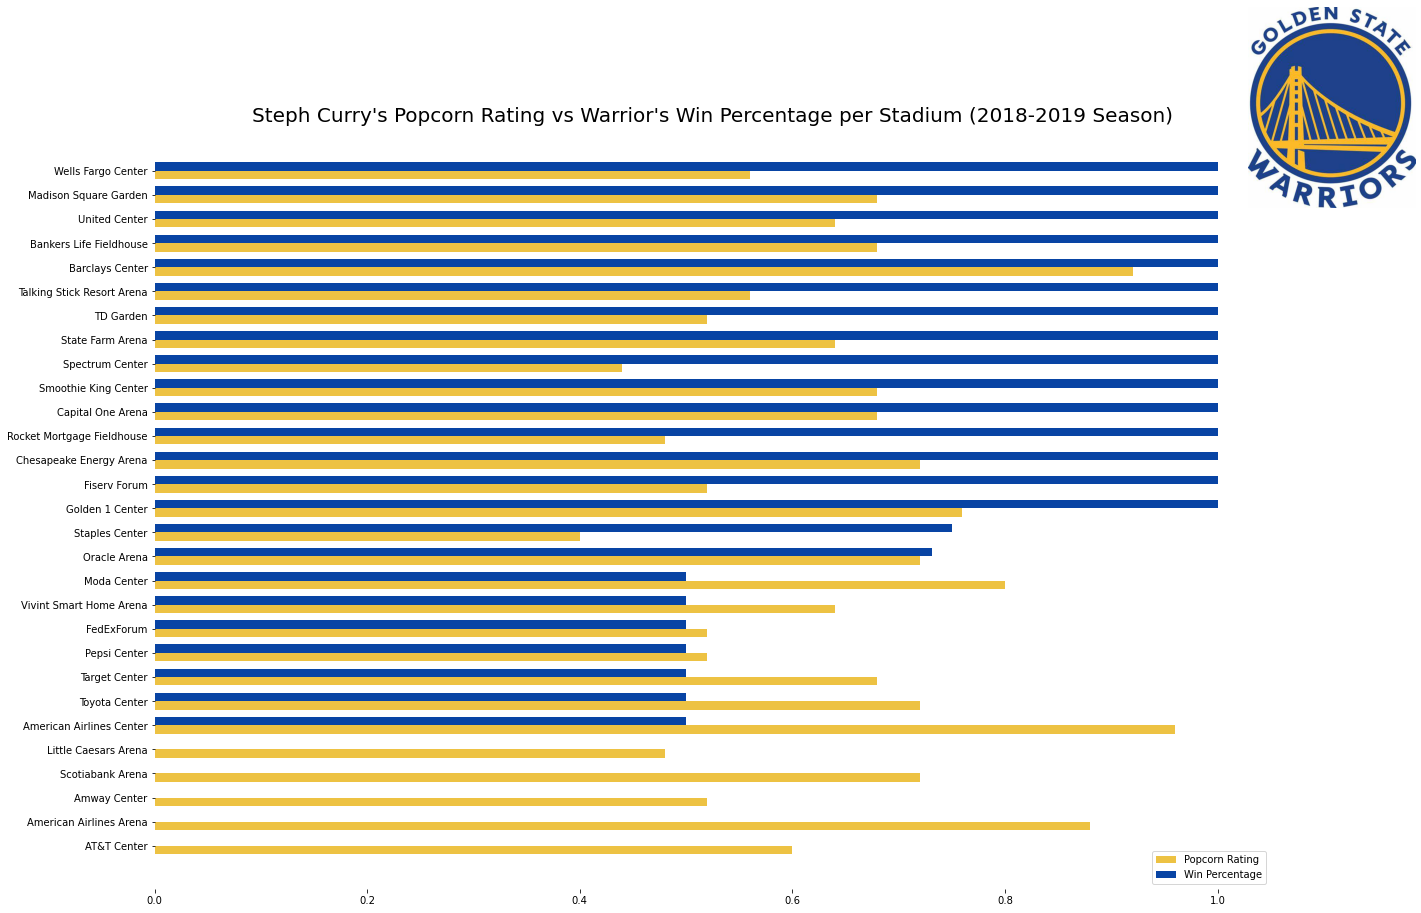

<Figure size 432x288 with 0 Axes>

In [144]:
import matplotlib.pyplot as plt

N = 29

ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots(figsize=(20, 14))

rects1 = ax.barh(ind, results_and_popcorn_ratings.Total_Score, width, color = "#EDC243")
rects2 = ax.barh(ind + width, results_and_popcorn_ratings.Win_Percentage_at_Stadium, width, color = "#0844A4")

# add some text for labels, title and axes ticks

ax.set_title("Steph Curry's Popcorn Rating vs Warrior's Win Percentage per Stadium (2018-2019 Season)",  fontsize=20)
ax.set_yticks(ind + width / 2)
ax.set_yticklabels(arenas)

ax.legend((rects1[0], rects2[0]), ('Popcorn Rating', 'Win Percentage'))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

im = plt.imread('golden-state-warriors-logo.jpg')
newax = fig.add_axes([0.8,0.8,0.2,0.2], anchor='NE', zorder=1)
newax.imshow(im)
newax.axis('off')


plt.show()
plt.tight_layout()
plt.savefig("assignment4.png")


## 5. Discussion

This visualization was concerned with answering the question of whether or not there is a relationship between Steph Curry's rating of each stadium's popcorn over the 2018-2019 season and how well his team, the Golden State Warriors, did at that stadium. Performance data from the season was collected from basketball-reference.com and Curry's popcorn rating data was sourced from Makeover Monday, which took the data from Steph Curry's rating system. Once the performance data was loaded, it was aggregated by stadium, and a winning percentage for each stadium during the 2018-2019 regular season by dividing the total wins at that stadium by the total times the team played at that stadium. Additionally, an overall score was calculated for each stadium's popcorn rating by dividing the total points received by the total points available. 

This question was motivated by an interview of Steph Curry in the NYTs, in which he explains that popcorn influences his enjoyment of the travel season, noting that bad popcorn affects his mood. The visualization compares the popcorn rating with the Warriors winning percentage at each stadium. This visualization indicates no clear relationship between Curry's rating of the stadium's popcorn and how well the warriors played at that stadium. However, the metric used to represent performance is not very rigorous. It does not take into account how highly ranked the opponent was, how many points were scored, whether or not players were injured, etc. 